In [116]:
import numpy as np # math arrays manipulation
import pandas as pd # for data management
import os 
    
import matplotlib.pyplot as plt #plots
import seaborn as sns #plots


path = os.getcwd() + "/SQL1doctordata.csv" # make sure you are in the correct directory

sal = pd.read_csv(path)
sal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Employee_ID                           15 non-null     int64 
 1   Fname                                 15 non-null     object
 2   Lname                                 15 non-null     object
 3   Salary                                15 non-null     int64 
 4   DOB                                   15 non-null     object
 5   Department_Dept_Code                  15 non-null     object
 6   speciality                            15 non-null     object
 7   yearsofexperience                     15 non-null     int64 
 8   count(distinct a.patient_patient_id)  15 non-null     int64 
 9   count(p.MEDICATION_Medication_Code)   15 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.3+ KB


In [117]:
sal.head(5)

,Employee_ID,Fname,Lname,Salary,DOB,Department_Dept_Code,speciality,yearsofexperience,count(distinct a.patient_patient_id),count(p.MEDICATION_Medication_Code)
0,1234,Bruce,Banner,150000,1/11/1989,CARDIO,Cardiology,10,3,9
1,1235,Stephen,Strange,150000,1/12/1989,A&E,Accident and emergency,15,1,1
2,1237,Leonard,McCoy,150000,1/14/1989,DEN,Dental,13,1,1
3,1240,Doogie,Howser,150000,2/24/1975,NEURO,Neurology,21,2,4
4,1241,Cristina,Yang,150000,2/25/1975,SUR,Surgery,4,1,1


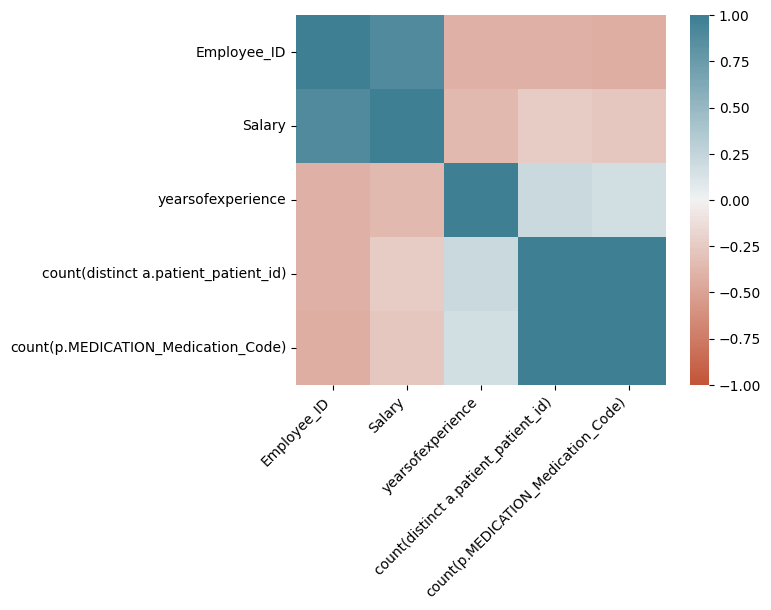

In [118]:
data = sal

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [119]:
sal.corr()

,Employee_ID,Salary,yearsofexperience,count(distinct a.patient_patient_id),count(p.MEDICATION_Medication_Code)
Employee_ID,1.000000,0.885967,-0.400210,-0.400960,-0.430592
Salary,0.885967,1.000000,-0.360766,-0.228218,-0.261359
yearsofexperience,-0.400210,-0.360766,1.000000,0.214066,0.179599
count(distinct a.patient_patient_id),-0.400960,-0.228218,0.214066,1.000000,0.988432
count(p.MEDICATION_Medication_Code),-0.430592,-0.261359,0.179599,0.988432,1.000000


In [120]:
from sklearn.model_selection import train_test_split

df_dc = pd.get_dummies(sal, columns=['Department_Dept_Code', 'speciality'])
df_dc.head
sal_train, sal_test = train_test_split(df_dc, train_size=0.8, random_state=25)

print(f"No. of training examples: {sal_train.shape[0]}")
print(f"No. of testing examples: {sal_test.shape[0]}")


No. of training examples: 12
No. of testing examples: 3


In [121]:
x_train = sal_train.drop(columns = ['Salary', 'Fname', 'Lname', 'Employee_ID', 'DOB'], axis = 1)
y_train = sal_train['Salary']

x_test = sal_test.drop(columns = ['Salary', 'Fname', 'Lname', 'Employee_ID', 'DOB'], axis = 1)
y_test = sal_test['Salary']

In [122]:
print(x_train)

    yearsofexperience  count(distinct a.patient_patient_id)  \
3                  21                                     2   
11                  9                                     1   
9                   7                                     1   
5                   7                                     1   
1                  15                                     1   
14                 11                                     1   
8                   5                                     2   
2                  13                                     1   
7                  11                                     2   
6                  10                                     1   
10                  8                                     1   
4                   4                                     1   

    count(p.MEDICATION_Medication_Code)  Department_Dept_Code_A&E  \
3                                     4                         0   
11                                    1   

In [123]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(x_train, y_train)

In [124]:
# model = LinearRegression()
# pred = regressor.predict(x_test)
# print("predicted values:\n\n", pred, "\n\n\n")

In [125]:
# import matplotlib.pyplot as plt
# plt.scatter(y_test, pred)
# plt.xlabel('true values')
# plt.ylabel('predictions')
# plt.title('true values vs. predicted values accuracy score: {0:.4f}'.format(score))
# plt.show()

In [126]:
R_squared = model1.score(x_train, y_train)
print('R_squared:', R_squared)

intercept = model1.intercept_
coefficients = model1.coef_

print('Intercept:', intercept)
print('Coefficients:', coefficients)

# # compute out-of-sample R_squared
#

sal_predictions = model1.predict(x_test)
OSR_squared = model1.score(x_test, y_test)
print(OSR_squared)

R_squared: 1.0
Intercept: 148666.6666666667
Coefficients: [ 6.82121026e-13  2.00000000e+03  6.00000000e+03 -3.33333333e+03
 -3.33333333e+03 -3.33333333e+03  6.66666667e+03  6.66666667e+03
 -1.33333333e+04  6.66666667e+03  6.66666667e+03  0.00000000e+00
  0.00000000e+00 -3.33333333e+03 -3.33333333e+03 -3.33333333e+03
 -3.33333333e+03  6.66666667e+03  6.66666667e+03 -1.33333333e+04
  6.66666667e+03  6.66666667e+03  0.00000000e+00  0.00000000e+00
 -3.33333333e+03]
-10.473333333333343


In [127]:
# def OSR2(model1, df_train, df_test, dependent_var):   
#     y_test = df_test[dependent_var]
#     y_pred = model1.predict(df_test.loc[:, df_test.columns != dependent_var])
#     RSS = np.sum((y_test - y_pred)**2)
#     TSS = np.sum((y_test - np.mean(df_test[dependent_var]))**2)    

#     return 1 - RSS/TSS

# ## Compute Out-of-sample adjusted R-squared using the test set

# def adjOSR2(model1, df_train, df_test, dependent_var): 
#     n = df_train.shape[0]
#     k = len(df_test.columns) -1
#     y_test = df_test[dependent_var]
#     y_pred = model1.predict(df_test.loc[:, df_test.columns != dependent_var])
#     RSS = np.sum((y_test - y_pred)**2)
#     TSS = np.sum((y_test - np.mean(df_test[dependent_var]))**2)    

#     return 1 - (RSS/TSS)*(n-1)/(n-k-1)

# cols = ['yearsofexperience','count(distinct a.patient_patient_id)','count(p.MEDICATION_Medication_Code)','Department_Dept_Code_A&E','Department_Dept_Code_CARDIO','Department_Dept_Code_DEN','Department_Dept_Code_ICU','Department_Dept_Code_INFECD','Department_Dept_Code_NEURO','Department_Dept_Code_NUCMED','speciality_Cardiology','speciality_Dental','speciality_Infectious','disease','speciality_Intensive Care','speciality_Neurology','speciality_Nuclear medicine','speciality_Oncology','speciality_Ophthalmology','speciality_Psychiatry','speciality_Surgery']
# total_cols = [el for el in cols]
# total_cols.append('Salary')
# print(f'Out of sample R2: {OSR2(model1, x_train[total_cols], x_test[total_cols], "Salary")}')
# print(f'Out of sample adjusted R2: {adjOSR2(model1, x_train[total_cols], x_test[total_cols], "Salary")}')

In [128]:
# # Calculate Variance Inflation Factor for each explanatory variable
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# cols = ['yearsofexperience','count(distinct a.patient_patient_id)','count(p.MEDICATION_Medication_Code)','Department_Dept_Code_A&E','Department_Dept_Code_CARDIO','Department_Dept_Code_DEN','Department_Dept_Code_ICU','Department_Dept_Code_INFECD','Department_Dept_Code_NEURO','Department_Dept_Code_NUCMED','speciality_Cardiology','speciality_Dental','speciality_Infectious','disease','speciality_Intensive Care','speciality_Neurology','speciality_Nuclear medicine','speciality_Oncology','speciality_Ophthalmology','speciality_Psychiatry','speciality_Surgery']
# def VIF(df, columns):
    
#     values = sm.add_constant(df_dc[columns]).values  # the dataframe passed to VIF must include the intercept term. We add it the same way we did before.
#     num_columns = len(columns)+1
#     vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
#     return pd.Series(vif[1:], index=columns)